In [1]:
# Read the parquet file in data/siddhart_gandhi_refpred folder and print it's first 5 rows
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import json

In [5]:
# read misc/repo_info.json into pandas dataframe, sort by number_of_commits and save the output to a file .txt file with <owner>/<repo_name> on each line, where both <owner> and <repo_name> are columns in the dataframe (in reverer order)



pd.read_json('../misc/repo_info.json').sort_values(by='number_of_commits', ascending=False)[['owner', 'repo_name']].to_csv('../misc/repo_info.txt', index=False, header=False, sep='/')


In [9]:
# see number of commits in repos/apache_spark using git log
!echo $HOSTNAME

boston-cluster.lti.cs.cmu.edu


In [47]:
code_extensions = json.load(open('code_extensions.json'))

In [12]:
# read repo_info.json in pd

df = pd.read_json('repo_info.json')

In [13]:
# filter out repos with number_of_commits > 30000
df = df[df['number_of_commits'] <= 30000]


# number of rows
print(df.shape[0])

84


In [14]:
df.head()

,repo_name,owner,number_of_stars,open_issue_count,language,number_of_commits,num_pull_requests
1,react,facebook,213923,1513,JavaScript,16006,13954
3,electron,electron,109247,905,C++,27745,20553
11,core,dotnet,19326,394,PowerShell,4192,1881
14,kafka,apache,25972,1068,Java,11746,14508
16,jekyll,jekyll,47347,198,Ruby,11679,4396


In [22]:
# sort the dataframe by number_of_commits in descending order
df = df.sort_values(by=['number_of_commits'], ascending=False)

In [23]:
df.head()

,repo_name,owner,number_of_stars,open_issue_count,language,number_of_commits,num_pull_requests
25,react-native,facebook,112309,1629,Java,29273,14284
17,cassandra,apache,8224,361,Java,29248,2779
79,spring-framework,spring-projects,53316,862,Java,28195,4431
44,angular,angular,90586,1569,TypeScript,28104,25137
3,electron,electron,109247,905,C++,27745,20553


In [24]:
# save <owner>_<repo_name> in a list
repo_list = []
for index, row in df.iterrows():
    repo_list.append(row['owner'] + '/' + row['repo_name'])


In [19]:
repo_list[:5]

['facebook/react',
 'electron/electron',
 'dotnet/core',
 'apache/kafka',
 'jekyll/jekyll']

In [25]:
# write the list to a file
with open('repo_list_30K.txt', 'w') as f:
    for item in repo_list:
        f.write("%s\n" % item)

In [2]:
def get_combined_df(repo_dir):
    all_files = glob.glob(os.path.join(repo_dir, '*.parquet'))
    all_dataframes = [pd.read_parquet(file) for file in all_files]
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    combined_df['commit_date'] = (combined_df['commit_date'].astype('int64') / 1e9).astype('int64')
    # replace NaN with empty string
    # combined_df.fillna('', inplace=True)
    return combined_df

In [16]:
# iterate through all repos in repos folder, get combined dataframe and print number of rows

# for repo in os.listdir('data'):
for repo in ['facebook_react']:
    # check if it is a non-empty directory
    if not os.path.isdir(os.path.join('data', repo)) or len(os.listdir(os.path.join('data', repo))) == 0:
        continue

    repo_dir = os.path.join('data', repo)
    combined_df = get_combined_df(repo_dir)
    memory_usage = combined_df.memory_usage(deep=True).sum() / 1e6
    print(f'{repo}: {memory_usage:.2f} MB ({combined_df.shape[0]} rows)')

facebook_react: 2844.48 MB (73765 rows)


In [6]:
# ethereum_go-ethereum: 2718.35 MB (83963 rows)
# jestjs_jest: 626.58 MB (28872 rows)
# rustdesk_rustdesk: 2162.34 MB (32124 rows)
# electron_electron: 1981.25 MB (83252 rows)
# commaai_openpilot: 911.06 MB (30391 rows)
# prometheus_prometheus: 5949.51 MB (100881 rows)
# siddharth-gandhi_refpred: 0.95 MB (87 rows)
# reduxjs_redux: 32.69 MB (5153 rows)
# apache_kafka: 3838.51 MB (75965 rows)
# neovim_neovim: 20174.65 MB (104514 rows)
# laravel_laravel: 195.14 MB (13638 rows)
# tmux_tmux: 1257.84 MB (28926 rows)
# huggingface_transformers: 5603.93 MB (56340 rows)
# psf_requests: 319.69 MB (7950 rows)
# gohugoio_hugo: 643.92 MB (20559 rows)
# apache_cassandra: 5554.05 MB (145187 rows)
# vuejs_vue: 766.83 MB (11249 rows)
# apollographql_apollo-client: 1131.80 MB (25663 rows)
# expressjs_express: 102.10 MB (7713 rows)
# facebook_react-native: 3615.54 MB (125668 rows)
# powershell_powershell: 4695.64 MB (59604 rows)
# dotnet_core: 1.31 MB (126 rows)
# babel_babel: 1867.66 MB (165294 rows)
# karpathy_nanogpt: 3.51 MB (190 rows)
# nodejs_node: 5390.54 MB (99693 rows)
# karpathy_llama2.c: 19.13 MB (402 rows)
# facebook_react: 2844.48 MB (73765 rows)
# ggerganov_llama.cpp: 696.00 MB (2321 rows)
# apache_spark: 7504.70 MB (127167 rows)
# angular_angular: 5011.42 MB (157014 rows)

In [10]:
def count_commits(repo_dir):
    all_files = glob.glob(os.path.join(repo_dir, '*.parquet'))
    all_dataframes = [pd.read_parquet(file) for file in all_files]
    combined_df = pd.concat(all_dataframes, ignore_index=True)

    # number of unique commit_id columns
    return combined_df.commit_id.nunique()

In [11]:
def get_commit_v_num_files(repo_dir):
    all_files = glob.glob(os.path.join(repo_dir, '*.parquet'))
    all_dataframes = [pd.read_parquet(file) for file in all_files]
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    # remove files that are not code files using this code
    # file_extension = file.split(".")[-1]
    #     if f".{file_extension}" not in code_extensions:
    #         continue

    # filter file_path column to only include code files
    # combined_df = combined_df[combined_df.file_path.str.endswith(tuple(code_extensions))]

    # number of unique commit_id columns
    return combined_df.groupby('commit_id').size().reset_index(name='num_files')

In [72]:
# i want to see how many files on average are changed in a commit and
total_commits = count_commits('data/karpathy_llama2.c')
df = get_commit_v_num_files('data/karpathy_llama2.c')
# enable index to be used as x-axis
df.reset_index(inplace=True)
# df.plot.scatter(x='commit_id', y='num_files')
# sort by number of files
df.sort_values(by='num_files', inplace=True, ascending=False)
# sum num_files column
total_files = df.num_files.sum()
print(total_files)
df.head()

402


,index,commit_id,num_files
189,189,bc7cb7d0e87ac7cbaa67cd51cdcc52cbfcacce32,10
2,2,01df3731d6747659ad4d8cf7d9f4bcb27eb6d5f0,10
249,249,eec9ad5a5be7f7df830112c390be69afe8d58e58,9
97,97,5b161abb9a043a132e290c549f2c1682e9bfb097,8
147,147,8b472ded1f354be093518bbc3c07283ea368167f,8


In [13]:
# plot total number of commits vs number of files changed in a commit
def plot_stats(repo_dir):
    # total_commits = count_commits(repo_dir)
    df = get_commit_v_num_files(repo_dir)
    # enable index to be used as x-axis
    df.reset_index(inplace=True)
    # df.plot.scatter(x='commit_id', y='num_files')
    # sort by number of files
    # df.sort_values(by='num_files', inplace=True, ascending=False)
    plt.scatter(df.index, df.num_files, s=1)
    plt.xlabel('Commit Number')
    plt.ylabel('Number of Files Changed')
    plt.title(f'Number of Files Changed in a Commit ({repo_dir.split("/")[-1]})')

    # plot average number of files changed in a commit

    avg_num_files = df.num_files.mean()
    plt.axhline(y=avg_num_files, color='r', linestyle='-')
    # label the line
    plt.text(0, avg_num_files, f'{avg_num_files:.2f} files changed in a commit on average', fontsize=12)

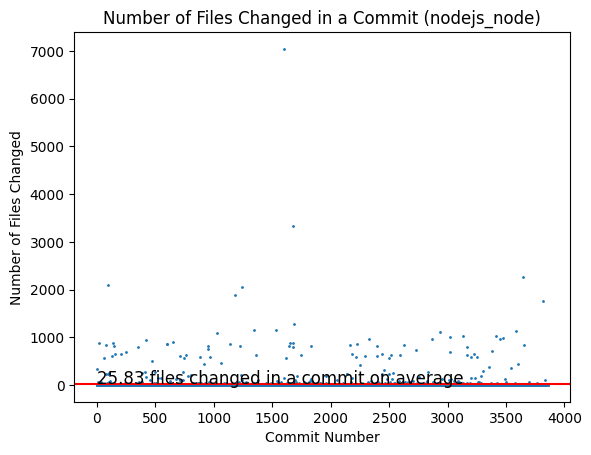

In [14]:
plot_stats('data/nodejs_node')

In [9]:
plot_stats('data/nodejs_node')

NameError: name 'get_commit_v_num_files' is not defined

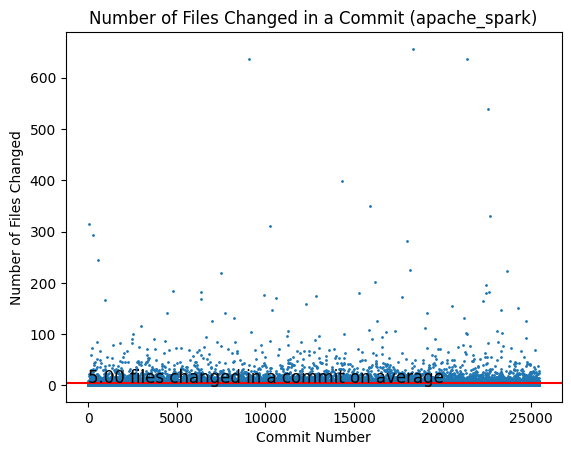

In [15]:
plot_stats('data/apache_spark')

In [18]:
import pstats
import sys

def get_most_time_consuming(filepath):
    # Load the stats file
    stats = pstats.Stats(filepath)

    # Sort the statistics by the cumulative time
    stats.sort_stats('cumtime')
    # get only top 50

    # Print the statistics to stdout
    stats.print_stats(20)

In [5]:
# count number of directories in profiling/nodejs_node directory
!ls profiling/nodejs_node | wc -l

21


In [19]:
get_most_time_consuming('profiling/apache_cassandra/apache_cassandra_stats_1.prof')

Tue Oct 10 14:35:34 2023    profiling/apache_cassandra/apache_cassandra_stats_1.prof

         9227495 function calls (9227001 primitive calls) in 592.704 seconds

   Ordered by: cumulative time
   List reduced from 1242 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000  592.705  592.705 /ssd/ssg2/scrape_local.py:287(main)
        1    0.023    0.023  592.704  592.704 /ssd/ssg2/scrape_local.py:198(scrape_repository)
     1000    0.614    0.001  590.482    0.590 /ssd/ssg2/scrape_local.py:107(process_commit)
    47941    0.908    0.000  589.807    0.012 /ssd/ssg2/scrape_local.py:37(run_command)
    47941    1.316    0.000  588.786    0.012 /home/ssg2/miniconda3/envs/ds/lib/python3.9/subprocess.py:464(run)
    47941    2.741    0.000  347.505    0.007 /home/ssg2/miniconda3/envs/ds/lib/python3.9/subprocess.py:756(__init__)
    47941    4.441    0.000  342.310    0.007 /home/ssg2/miniconda3/envs/ds/lib/python3.

In [108]:
def get_combined_df(repo_dir):
    all_files = glob.glob(os.path.join(repo_dir, '*.parquet'))
    all_files.sort()
    all_dataframes = [pd.read_parquet(file) for file in all_files]
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    combined_df['commit_date'] = (combined_df['commit_date'].astype('int64') / 1e9).astype('int64')
    # replace NaN with empty string
    # combined_df.fillna('', inplace=True)
    return combined_df

In [109]:
# 2 folders that need to be compared: data/karpathy_llama2.c and data/orig_karpathy_llama2.c
# read both folders into a dataframe using get_combined_df & compare the dataframes

# get dataframe for data/karpathy_llama2.c
df1 = get_combined_df('../data/karpathy_llama2.c')
# get dataframe for data/orig_karpathy_llama2.c
df2 = get_combined_df('../data/orig_karpathy_llama2.c')



In [110]:
print(df1.shape)
print(df2.shape)

(401, 13)
(402, 13)


In [194]:

# df1[df1['commit_id'] == 'eff1c1b425fca99cfacb8fcfda0a51277588e3ac']
# df2[df2['commit_id'] == 'eff1c1b425fca99cfacb8fcfda0a51277588e3ac']
# df2[df2['previous_commit_id'] == 'eff1c1b425fca99cfacb8fcfda0a51277588e3ac\n']
# df2[~df2['commit_id'].isin(df1['commit_id'])]
# df1[~df1['commit_id'].isin(df2['commit_id'])]

In [257]:
# check if the common rows are entirely the same


gg_df = get_combined_df('../data/ggerganov_whisper.cpp/')

In [258]:
gg_df.shape

(1125, 14)

In [259]:
# print unique status values
gg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   owner                  1125 non-null   string
 1   repo_name              1125 non-null   string
 2   commit_date            1125 non-null   int64 
 3   commit_id              1125 non-null   string
 4   commit_message         1125 non-null   string
 5   file_path              1125 non-null   string
 6   cur_file_content       1110 non-null   string
 7   previous_commit_id     945 non-null    string
 8   previous_file_path     7 non-null      string
 9   previous_file_content  945 non-null    string
 10  diff                   930 non-null    string
 11  status                 1125 non-null   object
 12  is_merge_request       1125 non-null   bool  
 13  file_extension         1125 non-null   object
dtypes: bool(1), int64(1), object(2), string(10)
memory usage: 115.5+ KB


In [120]:
# read file tmp/data_api/ggerganov_whisper.cpp_commits.txt and get the commit ids
# compare the commit ids with the commit ids in gg_df

# read file tmp/data_api/ggerganov_whisper.cpp_commits.txt and get the commit ids
with open('../tmp/data_api/ggerganov_whisper.cpp_commits.txt', 'r') as f:
    gg_commit_ids = f.readlines()

# make into a list
gg_commit_ids = [x.strip() for x in gg_commit_ids]

In [149]:
len(set(gg_commit_ids))

491

In [260]:
# unique commit ids in gg_df
len(gg_df.commit_id.unique())

491

In [147]:
# compare the commit ids with the commit ids in gg_df
gg_df[~gg_df['commit_id'].isin(gg_commit_ids)]

,owner,repo_name,commit_date,commit_id,commit_message,file_path,previous_commit_id,previous_file_content,cur_file_content,diff,status,is_merge_request,file_extension


In [148]:
# opposite - commit ids in gg_commit_ids but not in gg_df (but gg_commit_ids is a list not a dataframe)

for commit_id in gg_commit_ids:
    if commit_id not in gg_df['commit_id'].values:
        print(commit_id)

In [261]:
gg_df[gg_df['commit_id'] == 'b0a11594aec50892a02cd8d129eee2dfe93a8bb8']

,owner,repo_name,commit_date,commit_id,commit_message,file_path,cur_file_content,previous_commit_id,previous_file_path,previous_file_content,diff,status,is_merge_request,file_extension
1120,ggerganov,whisper.cpp,1664133229,b0a11594aec50892a02cd8d129eee2dfe93a8bb8,Initial release,convert-pt-to-ggml.py,# Convert Whisper transformer model from PyTor...,<NA>,<NA>,<NA>,<NA>,added,False,py
1121,ggerganov,whisper.cpp,1664133229,b0a11594aec50892a02cd8d129eee2dfe93a8bb8,Initial release,dr_wav.h,/* WAV audio loader and writer. Choice of publ...,<NA>,<NA>,<NA>,<NA>,added,False,h
1122,ggerganov,whisper.cpp,1664133229,b0a11594aec50892a02cd8d129eee2dfe93a8bb8,Initial release,ggml.c,"#include ""ggml.h"" #include <assert.h> #includ...",<NA>,<NA>,<NA>,<NA>,added,False,c
1123,ggerganov,whisper.cpp,1664133229,b0a11594aec50892a02cd8d129eee2dfe93a8bb8,Initial release,ggml.h,"#pragma once #ifdef __cplusplus extern ""C"" {...",<NA>,<NA>,<NA>,<NA>,added,False,h
1124,ggerganov,whisper.cpp,1664133229,b0a11594aec50892a02cd8d129eee2dfe93a8bb8,Initial release,main.cpp,"#include ""ggml.h"" // third-party utilities //...",<NA>,<NA>,<NA>,<NA>,added,False,cpp


In [ ]:
gg_df[gg_df['commit_id'] == 'b0a11594aec50892a02cd8d129eee2dfe93a8bb8']

,owner,repo_name,commit_date,commit_id,commit_message,file_path,previous_commit_id,previous_file_content,cur_file_content,diff,status,is_merge_request,file_extension
1122,ggerganov,whisper.cpp,1664133229,b0a11594aec50892a02cd8d129eee2dfe93a8bb8,Initial release,convert-pt-to-ggml.py,<NA>,<NA>,# Convert Whisper transformer model from PyTor...,<NA>,added,False,py
1123,ggerganov,whisper.cpp,1664133229,b0a11594aec50892a02cd8d129eee2dfe93a8bb8,Initial release,dr_wav.h,<NA>,<NA>,/* WAV audio loader and writer. Choice of publ...,<NA>,added,False,h
1124,ggerganov,whisper.cpp,1664133229,b0a11594aec50892a02cd8d129eee2dfe93a8bb8,Initial release,ggml.c,<NA>,<NA>,"#include ""ggml.h"" #include <assert.h> #includ...",<NA>,added,False,c
1125,ggerganov,whisper.cpp,1664133229,b0a11594aec50892a02cd8d129eee2dfe93a8bb8,Initial release,ggml.h,<NA>,<NA>,"#pragma once #ifdef __cplusplus extern ""C"" {...",<NA>,added,False,h
1126,ggerganov,whisper.cpp,1664133229,b0a11594aec50892a02cd8d129eee2dfe93a8bb8,Initial release,main.cpp,<NA>,<NA>,"#include ""ggml.h"" // third-party utilities //...",<NA>,added,False,cpp


In [139]:
with open("../misc/code_extensions.json", "r", encoding="utf-8") as f:
    code_extensions = set(json.load(f))

In [146]:
# print rows from gg_df if file_extension is in not in code_extensions (append a . to the file_extension)

gg_df[~gg_df['file_path'].str.split('.').str[-1].isin(code_extensions)]

,owner,repo_name,commit_date,commit_id,commit_message,file_path,previous_commit_id,previous_file_content,cur_file_content,diff,status,is_merge_request,file_extension
0,ggerganov,whisper.cpp,1695042945,b440ef8c96bb5175b44c275a7b4ed450061e9bae,binding : fix ruby build by adding missing ggm...,bindings/ruby/ext/extconf.rb,700f63a8062cd3b5c85afa9204a2c39d91d868ed,"require 'mkmf' system(""cp #{File.join(File.dir...","require 'mkmf' system(""cp #{File.join(File.dir...","@@ -3,6 +3,8 @@ system(""cp #{File.join(File.di...",modified,False,rb
1,ggerganov,whisper.cpp,1695023470,700f63a8062cd3b5c85afa9204a2c39d91d868ed,bench: fix missing include <cstring> (#1303),examples/bench/bench.cpp,951a1199265ff4424f938182542cf6bac9b36154,"#include ""whisper.h"" #include <cstdio> #inclu...","#include ""whisper.h"" #include <cstdio> #inclu...","@@ -1,6 +1,7 @@ #include ""whisper.h"" #incl...",modified,False,cpp
2,ggerganov,whisper.cpp,1694801503,951a1199265ff4424f938182542cf6bac9b36154,whisper : increase tokenizer buffer (close #12...,whisper.cpp,1ca4041b86022582aa4381697b3f5438be27bc95,"#include ""whisper.h"" #ifdef WHISPER_USE_COREML...","#include ""whisper.h"" #ifdef WHISPER_USE_COREML...","@@ -4520,7 +4520,7 @@ int whisper_full_with_st...",modified,False,cpp
3,ggerganov,whisper.cpp,1694797591,1ca4041b86022582aa4381697b3f5438be27bc95,talk-llama : update to latest llama.cpp,examples/talk-llama/llama-util.h,80c1512fd580245d0895a99b4ad906c0ac7ccabb,// Internal header to be included only by llam...,<NA>,<NA>,deleted,False,h
4,ggerganov,whisper.cpp,1694797591,1ca4041b86022582aa4381697b3f5438be27bc95,talk-llama : update to latest llama.cpp,examples/talk-llama/llama.cpp,80c1512fd580245d0895a99b4ad906c0ac7ccabb,"#include ""llama-util.h"" #include ""llama.h"" #i...","#include ""llama.h"" #include ""ggml.h"" #includ...","@@ -1,1133 +1,2275 @@ -#include ""llama-util.h""...",modified,False,cpp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,ggerganov,whisper.cpp,1664133229,b0a11594aec50892a02cd8d129eee2dfe93a8bb8,Initial release,convert-pt-to-ggml.py,<NA>,<NA>,# Convert Whisper transformer model from PyTor...,<NA>,added,False,py
1123,ggerganov,whisper.cpp,1664133229,b0a11594aec50892a02cd8d129eee2dfe93a8bb8,Initial release,dr_wav.h,<NA>,<NA>,/* WAV audio loader and writer. Choice of publ...,<NA>,added,False,h
1124,ggerganov,whisper.cpp,1664133229,b0a11594aec50892a02cd8d129eee2dfe93a8bb8,Initial release,ggml.c,<NA>,<NA>,"#include ""ggml.h"" #include <assert.h> #includ...",<NA>,added,False,c
1125,ggerganov,whisper.cpp,1664133229,b0a11594aec50892a02cd8d129eee2dfe93a8bb8,Initial release,ggml.h,<NA>,<NA>,"#pragma once #ifdef __cplusplus extern ""C"" {...",<NA>,added,False,h


In [152]:
# compare counts form the list of commit ids and the dataframe (somoething is wrong with the dataframe leading to 2 extra rows even though the commit ids are the same)

# store counts in a dictionary
counts = {}
for commit_id in gg_commit_ids:
    counts[commit_id] = gg_df[gg_df['commit_id'] == commit_id].shape[0]

In [154]:
# compare counts to counts of commit_ids in gg_df

# store counts in a dictionary
counts2 = {}
for commit_id in gg_df.commit_id.unique():
    counts2[commit_id] = gg_df[gg_df['commit_id'] == commit_id].shape[0]

In [167]:
# compare counts and counts2
for commit_id in counts:
    if counts[commit_id] != counts2[commit_id]:
        print(commit_id)

In [156]:
len(gg_commit_ids)

1125

In [157]:
gg_df.commit_id.shape

(1127,)

In [176]:
# give white space separated commit_id, file_path in ../tmp/data_api/ggerganov_whisper.cpp_commits.txt, check the same rows in gg_df
# gg_df contains 2 extra rows in total, so compare commit_id and file_path in gg_df with the same in ../tmp/data_api/ggerganov_whisper.cpp_commits.txt and print the extra rows in gg_df

# read file tmp/data_api/ggerganov_whisper.cpp_commits.txt and get the commit ids
with open('../tmp/data_api/ggerganov_whisper.cpp_commits.txt', 'r') as f:
    gg_commit_ids = f.readlines()

# make into a tuple list
gg_commit_ids = [tuple(x.strip().split(' ')) for x in gg_commit_ids]

# convert gg_commit_ids to a dataframe
gg_commit_ids = pd.DataFrame(gg_commit_ids, columns=['commit_id', 'file_path'])


# # compare the commit ids with the commit ids in gg_df
# for commit_id, file_path in gg_commit_ids:
#     if gg_df[(gg_df['commit_id'] == commit_id) & (gg_df['file_path'] == file_path)].shape[0] == 0:
#         print(commit_id, file_path)

In [177]:
# compare commit_id and file path in gg_df to gg_commit_ids and print the difference

for index, row in gg_df.iterrows():
    if gg_commit_ids[(gg_commit_ids['commit_id'] == row['commit_id']) & (gg_commit_ids['file_path'] == row['file_path'])].shape[0] == 0:
        print(row['commit_id'], row['file_path'])

5b9e59bc07dd76320354f2af6be29f16dbcb21e7 examples/talk-llama/speak.sh
5b9e59bc07dd76320354f2af6be29f16dbcb21e7 examples/talk/speak.sh
794b162a464cc5f3af62d012bc243641fd18b60a examples/talk-llama/llama_util.h
bb6b54a03d442833dcc34fda6c09d585a112bbcf extra/qual-bench.sh
c6710efde20e858e8588aac65dc1f96f5a815f31 download-ggml-model.sh
c6710efde20e858e8588aac65dc1f96f5a815f31 dr_wav.h
c6710efde20e858e8588aac65dc1f96f5a815f31 main.cpp
c6710efde20e858e8588aac65dc1f96f5a815f31 stream.cpp
6b45e37b2b4a536f6e7c7df8f7c15d94623df2e9 convert-pt-to-ggml.py


In [181]:
for index, row in gg_commit_ids.iterrows():
    if gg_df[(gg_df['commit_id'] == row['commit_id']) & (gg_df['file_path'] == row['file_path'])].shape[0] == 0:
        print(row['commit_id'], row['file_path'])

794b162a464cc5f3af62d012bc243641fd18b60a examples/talk-llama/llama-util.h
bb6b54a03d442833dcc34fda6c09d585a112bbcf extra/bench-wts.sh
c6710efde20e858e8588aac65dc1f96f5a815f31 examples/dr_wav.h
c6710efde20e858e8588aac65dc1f96f5a815f31 examples/main/main.cpp
c6710efde20e858e8588aac65dc1f96f5a815f31 examples/stream/stream.cpp
c6710efde20e858e8588aac65dc1f96f5a815f31 models/download-ggml-model.sh
6b45e37b2b4a536f6e7c7df8f7c15d94623df2e9 models/convert-pt-to-ggml.py


In [186]:
gg_commit_ids[(gg_commit_ids['commit_id'] == '5b9e59bc07dd76320354f2af6be29f16dbcb21e7')]

,commit_id,file_path
193,5b9e59bc07dd76320354f2af6be29f16dbcb21e7,examples/talk-llama/speak.bat
194,5b9e59bc07dd76320354f2af6be29f16dbcb21e7,examples/talk-llama/speak.ps1
195,5b9e59bc07dd76320354f2af6be29f16dbcb21e7,examples/talk-llama/talk-llama.cpp
196,5b9e59bc07dd76320354f2af6be29f16dbcb21e7,examples/talk/speak.bat
197,5b9e59bc07dd76320354f2af6be29f16dbcb21e7,examples/talk/speak.ps1
198,5b9e59bc07dd76320354f2af6be29f16dbcb21e7,examples/talk/talk.cpp


In [214]:
#count of renames in gg_df via status column
gg_df[gg_df['status'] == 'renamed'].shape[0]

0

In [188]:
# set of (commit, file_path) tuples in gg_df
set1 = set([(row['commit_id'], row['file_path']) for index, row in gg_df.iterrows()])

set2 = set([(row['commit_id'], row['file_path']) for index, row in gg_commit_ids.iterrows()])

In [189]:
set1 - set2

{('5b9e59bc07dd76320354f2af6be29f16dbcb21e7', 'examples/talk-llama/speak.sh'),
 ('5b9e59bc07dd76320354f2af6be29f16dbcb21e7', 'examples/talk/speak.sh'),
 ('6b45e37b2b4a536f6e7c7df8f7c15d94623df2e9', 'convert-pt-to-ggml.py'),
 ('794b162a464cc5f3af62d012bc243641fd18b60a',
  'examples/talk-llama/llama_util.h'),
 ('bb6b54a03d442833dcc34fda6c09d585a112bbcf', 'extra/qual-bench.sh'),
 ('c6710efde20e858e8588aac65dc1f96f5a815f31', 'download-ggml-model.sh'),
 ('c6710efde20e858e8588aac65dc1f96f5a815f31', 'dr_wav.h'),
 ('c6710efde20e858e8588aac65dc1f96f5a815f31', 'main.cpp'),
 ('c6710efde20e858e8588aac65dc1f96f5a815f31', 'stream.cpp')}

In [190]:
set2 - set1

{('6b45e37b2b4a536f6e7c7df8f7c15d94623df2e9', 'models/convert-pt-to-ggml.py'),
 ('794b162a464cc5f3af62d012bc243641fd18b60a',
  'examples/talk-llama/llama-util.h'),
 ('bb6b54a03d442833dcc34fda6c09d585a112bbcf', 'extra/bench-wts.sh'),
 ('c6710efde20e858e8588aac65dc1f96f5a815f31', 'examples/dr_wav.h'),
 ('c6710efde20e858e8588aac65dc1f96f5a815f31', 'examples/main/main.cpp'),
 ('c6710efde20e858e8588aac65dc1f96f5a815f31', 'examples/stream/stream.cpp'),
 ('c6710efde20e858e8588aac65dc1f96f5a815f31', 'models/download-ggml-model.sh')}

In [8]:
import git

In [6]:
repo_path = '../repos/pytorch_pytorch/'

In [9]:
repo = git.Repo(repo_path)


In [10]:
def get_all_commits(repo):
    return [commit.hexsha for commit in repo.iter_commits()]

In [11]:
all_commits = get_all_commits(repo)

In [12]:
len(all_commits)

65340

In [76]:

# Facebook React 3811, 6769, 8630, 11489, 13048, 14140
# Apache Cassandra 2338 2379 2634
commit_sha = all_commits[20789]
print(commit_sha)
cur_commit = repo.commit(commit_sha)

232faeacf8ada21d4dbbcb9cd296a67a99dccf9e


In [ ]:
cur_commit = repo.commit('2fdf1d27620fe2bce2a3c5989beab40b05fda1e6')

In [77]:
cur_commit.parents

(<git.Commit "7906ac40dd1bbe3200fda334d645970fb5f58c61">,)

In [32]:
def get_all_files_from_tree(tree):
    files = []
    for item in tree:
        if item.type == 'blob':
            files.append(item.path)
        elif item.type == 'tree':
            files.extend(get_all_files_from_tree(item))
    return files

In [86]:
def get_files_changed_in_commit(commit):
    is_merge_request = len(commit.parents) > 1

    # If it's the initial commit
    if not commit.parents:
        return [(file, 'A') for file in get_all_files_from_tree(commit.tree)], is_merge_request

    # For other commits, compare with the first parent to get the diff
    # diff_index = commit.diff(commit.parents[0])
    diff_index = commit.parents[0].diff(commit)

    files_changed = []
    for diff in diff_index:
        if diff.change_type == 'R':
            files_changed.append(((diff.a_path, diff.b_path), diff.change_type))
        else:
            path = diff.b_path if diff.change_type != 'D' else diff.a_path
            files_changed.append((path, diff.change_type))

    return files_changed, is_merge_request

In [87]:
def get_file_content_at_commit(commit, file_path, parent=False):
    target_commit = commit.parents[0] if parent else commit
    if file_path not in target_commit.tree:
        print(f"[WARNING] File '{file_path}' not found in commit {target_commit.hexsha}. Skipping.")
        return None
    byte_content = target_commit.tree[file_path].data_stream.read()

    try:
        decoded_content = byte_content.decode('utf-8')
        return decoded_content
    except Exception:
        print(f"[WARNING] Skipping {file_path} at commit {commit.hexsha} as it's not UTF-8 encoded.")
        return None

In [343]:
# get_files_changed_in_commit(repo.commit('2fdf1d27620fe2bce2a3c5989beab40b05fda1e6'))

In [80]:
get_files_changed_in_commit(cur_commit)

([('test/run_test.py', 'M'),
  ('test/test_ops.py', 'M'),
  ('test/test_ops_gradients.py', 'D'),
  ('test/test_ops_jit.py', 'D'),
  ('torch/autograd/gradcheck.py', 'M')],
 False)

In [85]:
get_file_content_at_commit(cur_commit, 'test/run_test.py')

[WARNING] File 'test/run_test.py' not found in commit 232faeacf8ada21d4dbbcb9cd296a67a99dccf9e. Skipping.


In [88]:
import pandas as pd

In [93]:
def parse_file(file_path):
    with open(file_path, 'r') as f:
        content = f.read()

    chunks = content.split("Repo Path: ")[1:]  # Exclude the first split as it'll be empty
    data = []

    for chunk in chunks:
        lines = chunk.strip().split('\n')
        if len(lines) != 12:  # We have subtracted one line (Repo Path) from 13
            continue

        try:
            repo_name = lines[0].split('/')[-1]
            total_commits_stored = int(lines[1].split(': ')[1])
            total_rows_stored = int(lines[2].split(': ')[1])
            index_stats = eval(lines[6].split(': ')[1])

            MAP = float(lines[8].split(': ')[1])
            P_at_10 = float(lines[9].split(': ')[1])
            P_at_100 = float(lines[10].split(': ')[1])
            P_at_1000 = float(lines[11].split(': ')[1])
            MRR = float(lines[12].split(': ')[1])
            Recall_at_1000 = float(lines[13].split(': ')[1])

            data.append({
                'repo_name': repo_name,
                'total_commits_stored': total_commits_stored,
                'total_rows_stored': total_rows_stored,
                'index_total_terms': index_stats['total_terms'],
                'index_documents': index_stats['documents'],
                'index_non_empty_documents': index_stats['non_empty_documents'],
                'index_unique_terms': index_stats['unique_terms'],
                'MAP': MAP,
                'P@10': P_at_10,
                'P@100': P_at_100,
                'P@1000': P_at_1000,
                'MRR': MRR,
                'Recall@1000': Recall_at_1000
            })
        except Exception as e:
            print(f"Error while parsing chunk:\n{chunk}\nError: {e}")

    df = pd.DataFrame(data)
    return df


In [94]:
file_path = '../tmp/log.txt'
df = parse_file(file_path)

In [96]:
df.head()

""


In [103]:
# Adjusting the extraction process to simplify the handling of 'Index Stats' lines

# Re-initialize empty lists to hold data
repo_names = []
total_commits_stored = []
total_rows_stored = []
index_total_terms = []
index_documents = []
index_non_empty_documents = []
index_unique_terms = []
MAP = []
P_at_10 = []
P_at_100 = []
P_at_1000 = []
MRR = []
Recall_at_1000 = []

# Read and process the file
with open("../tmp/log.txt", "r") as f:
    lines = f.readlines()
    for i in range(0, len(lines), 13):  # since each entity is 13 lines long
        repo_name = lines[i].split('/')[-1].strip()
        repo_names.append(repo_name)

        total_commits_stored.append(int(lines[i+1].split(':')[-1].strip()))
        total_rows_stored.append(int(lines[i+2].split(':')[-1].strip()))

        # Extracting index stats without using eval
        index_stats_line = lines[i+5].replace("Index Stats: ", "").replace("{", "").replace("}", "").replace("'", "").strip()
        index_stats_split = [item.split(':') for item in index_stats_line.split(',')]
        index_stats_dict = {item[0].strip(): int(item[1].strip()) for item in index_stats_split}

        index_total_terms.append(index_stats_dict['total_terms'])
        index_documents.append(index_stats_dict['documents'])
        index_non_empty_documents.append(index_stats_dict['non_empty_documents'])
        index_unique_terms.append(index_stats_dict['unique_terms'])

        # Extracting evaluation metrics
        MAP.append(float(lines[i+7].split(':')[-1].strip()))
        P_at_10.append(float(lines[i+8].split(':')[-1].strip()))
        P_at_100.append(float(lines[i+9].split(':')[-1].strip()))
        P_at_1000.append(float(lines[i+10].split(':')[-1].strip()))
        MRR.append(float(lines[i+11].split(':')[-1].strip()))
        Recall_at_1000.append(float(lines[i+12].split(':')[-1].strip()))

# Create DataFrame
df = pd.DataFrame({
    'repo_name': repo_names,
    'total_commits_stored': total_commits_stored,
    'total_rows_stored': total_rows_stored,
    'index_total_terms': index_total_terms,
    'index_documents': index_documents,
    'index_non_empty_documents': index_non_empty_documents,
    'index_unique_terms': index_unique_terms,
    'MAP': MAP,
    'P@10': P_at_10,
    'P@100': P_at_100,
    'P@1000': P_at_1000,
    'MRR': MRR,
    'Recall@1000': Recall_at_1000
})

df.head()  # Displaying the first few rows of the resulting DataFrame

,repo_name,total_commits_stored,total_rows_stored,index_total_terms,index_documents,index_non_empty_documents,index_unique_terms,MAP,P@10,P@100,P@1000,MRR,Recall@1000
0,hashicorp_vault,11516,120238,11971700,120238,120238,13518,0.0435,0.073,0.0220,0.0044,0.1943,0.3993
1,huginn_huginn,2592,9346,273068,9346,9346,6203,0.0302,0.117,0.0402,0.0094,0.2974,0.7566
2,scrapy_scrapy,7263,43406,10402072,43406,43406,8286,0.0292,0.103,0.0416,0.0115,0.2698,0.7858
3,golang_go,52455,286618,723718383,286618,286618,23904,0.0072,0.004,0.0015,0.0003,0.0220,0.0857
4,mozilla_pdf.js,15239,38275,2324782,38275,38275,13253,0.1179,0.225,0.0847,0.0227,0.6025,0.8620


In [104]:
df.shape

(74, 13)

In [106]:
df.to_csv('../misc/repos_bm25_stats.csv', index=False)

In [5]:
repo_path = '../2_7/apache_kafka'

In [6]:
df = get_combined_df(repo_path)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75655 entries, 0 to 75654
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   owner                  75655 non-null  string  
 1   repo_name              75655 non-null  string  
 2   commit_date            75655 non-null  int64   
 3   commit_id              75655 non-null  string  
 4   commit_message         75655 non-null  string  
 5   file_path              75655 non-null  string  
 6   cur_file_content       74139 non-null  string  
 7   previous_commit_id     68859 non-null  string  
 8   previous_file_path     1397 non-null   string  
 9   previous_file_content  68859 non-null  string  
 10  diff                   67312 non-null  string  
 11  status                 75655 non-null  category
 12  is_merge_request       75655 non-null  bool    
 13  file_extension         75655 non-null  object  
dtypes: bool(1), category(1), int64(1), obj

In [8]:
# see the average number of words across all commit_messages
df['commit_message'].str.split().str.len().mean()

61.540519463353384

In [4]:
from transformers import RobertaTokenizer, BertTokenizer, AutoTokenizer

# Sample text
text = "KAFKA-15534: Inject request completion time when the request failed (#……14532) Currently, we aren't able to access the request completion time if the request is completed exceptionally, which results in many system calls. This is not ideal because these system calls can add up. Instead, time is already retrieved on the top of the background thread event loop, which is then propagated into the NetworkClientDelegate.poll. In this PR - I store the completion time in the handler, so that it becomes accessible in the callbacks. Reviewer: Bruno Cadonna <cadonna@apache.org>"

# Initialize the CodeBERT tokenizer
codebert_tokenizer = RobertaTokenizer.from_pretrained("microsoft/codebert-base")

# Initialize CodeBERT AutoTokenizer
codebert_auto_tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")

# Initialize the BERT-base-uncased tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the text using CodeBERT
codebert_tokens = codebert_tokenizer.tokenize(text)

# Tokenize the text using CodeBERT AutoTokenizer
codebert_auto_tokens = codebert_auto_tokenizer.tokenize(text)

# Tokenize the text using BERT-base-uncased
bert_tokens = bert_tokenizer.tokenize(text)

# Print the tokens
print("CodeBERT Tokens:", codebert_tokens)
print("CodeBERT AutoTokenizer Tokens:", codebert_auto_tokens)
print("BERT-base-uncased Tokens:", bert_tokens)

# print the number of tokens
print("CodeBERT Tokens:", len(codebert_tokens))
print("CodeBERT AutoTokenizer Tokens:", len(codebert_auto_tokens))
print("BERT-base-uncased Tokens:", len(bert_tokens))

CodeBERT Tokens: ['K', 'AF', 'KA', '-', '155', '34', ':', 'ĠIn', 'ject', 'Ġrequest', 'Ġcompletion', 'Ġtime', 'Ġwhen', 'Ġthe', 'Ġrequest', 'Ġfailed', 'Ġ(#', 'âĢ¦âĢ¦', '145', '32', ')', 'ĠCurrently', ',', 'Ġwe', 'Ġaren', "'t", 'Ġable', 'Ġto', 'Ġaccess', 'Ġthe', 'Ġrequest', 'Ġcompletion', 'Ġtime', 'Ġif', 'Ġthe', 'Ġrequest', 'Ġis', 'Ġcompleted', 'Ġexceptionally', ',', 'Ġwhich', 'Ġresults', 'Ġin', 'Ġmany', 'Ġsystem', 'Ġcalls', '.', 'ĠThis', 'Ġis', 'Ġnot', 'Ġideal', 'Ġbecause', 'Ġthese', 'Ġsystem', 'Ġcalls', 'Ġcan', 'Ġadd', 'Ġup', '.', 'ĠInstead', ',', 'Ġtime', 'Ġis', 'Ġalready', 'Ġretrieved', 'Ġon', 'Ġthe', 'Ġtop', 'Ġof', 'Ġthe', 'Ġbackground', 'Ġthread', 'Ġevent', 'Ġloop', ',', 'Ġwhich', 'Ġis', 'Ġthen', 'Ġpropag', 'ated', 'Ġinto', 'Ġthe', 'ĠNetwork', 'Client', 'De', 'legate', '.', 'poll', '.', 'ĠIn', 'Ġthis', 'ĠPR', 'Ġ-', 'ĠI', 'Ġstore', 'Ġthe', 'Ġcompletion', 'Ġtime', 'Ġin', 'Ġthe', 'Ġhandler', ',', 'Ġso', 'Ġthat', 'Ġit', 'Ġbecomes', 'Ġaccessible', 'Ġin', 'Ġthe', 'Ġcall', 'backs', '.', 'Ġ

In [49]:
orig = [-0.044916242361068726, -0.044916242361068726, -0.044916242361068726, -0.044916242361068726, -0.044916242361068726, -0.044916242361068726, -0.044916242361068726, -0.044916242361068726, -0.044916242361068726, -0.044916242361068726, -0.044916242361068726, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.06638672947883606, -0.07770097255706787, -0.07770097255706787, -0.10275554656982422, -0.10275554656982422, -0.10275554656982422, -0.10275554656982422, -0.10275554656982422, -0.10275554656982422]
enum = list(enumerate(orig))

In [50]:

enum.sort(key=lambda x: x[1], reverse=True)

In [51]:
enum

[(0, -0.044916242361068726),
 (1, -0.044916242361068726),
 (2, -0.044916242361068726),
 (3, -0.044916242361068726),
 (4, -0.044916242361068726),
 (5, -0.044916242361068726),
 (6, -0.044916242361068726),
 (7, -0.044916242361068726),
 (8, -0.044916242361068726),
 (9, -0.044916242361068726),
 (10, -0.044916242361068726),
 (11, -0.05783930420875549),
 (12, -0.05783930420875549),
 (13, -0.05783930420875549),
 (14, -0.05783930420875549),
 (15, -0.05783930420875549),
 (16, -0.05783930420875549),
 (17, -0.05783930420875549),
 (18, -0.05783930420875549),
 (19, -0.05783930420875549),
 (20, -0.05783930420875549),
 (21, -0.05783930420875549),
 (22, -0.05783930420875549),
 (23, -0.05783930420875549),
 (24, -0.05783930420875549),
 (25, -0.05783930420875549),
 (26, -0.05783930420875549),
 (27, -0.05783930420875549),
 (28, -0.05783930420875549),
 (29, -0.05783930420875549),
 (30, -0.05783930420875549),
 (31, -0.05783930420875549),
 (32, -0.05783930420875549),
 (33, -0.05783930420875549),
 (34, -0.0578

In [43]:
len(now)

TypeError: object of type 'NoneType' has no len()

In [ ]:
[-0.044916242361068726, -0.044916242361068726, -0.044916242361068726, -0.044916242361068726, -0.044916242361068726, -0.044916242361068726, -0.044916242361068726, -0.044916242361068726, -0.044916242361068726, -0.044916242361068726, -0.044916242361068726, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.05783930420875549, -0.06638672947883606, -0.07770097255706787, -0.07770097255706787, -0.10275554656982422, -0.10275554656982422, -0.10275554656982422, -0.10275554656982422, -0.10275554656982422, -0.10275554656982422]

In [28]:
q, p = ('KAFKA-13791: Fix potential race condition in FetchResponse#`fetchData` and `forgottenTopics` (#11981)\n\nFix FetchResponse#`fetchData` and `forgottenTopics`: Assignment of lazy-initialized members should be the last step with double-checked locking\r\n\r\nReviewers: Luke Chen <showuon@gmail.com>', "KAFKA-13777: Fix potential FetchResponse#responseData race condition issue (#11963)\n\nIn Fix FetchResponse#responseData, we did a double-checked lock for the responseData, but the assignment of lazy-initialized object(responseData) didn't assign in the last step, which would let other threads get the partial object. \r\n\r\nReviewers: David Jacot <djacot@confluent.io>, Luke Chen <showuon@gmail.com>\r\n")

In [5]:
model_name = 'microsoft/codebert-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [20]:
q = 'hello world'
p = 'how are you'

In [33]:
tokenized_qp = tokenizer.encode_plus(q,p, max_length=512, truncation=True, padding='max_length', return_tensors='pt', add_special_tokens=True, return_token_type_ids=True, return_attention_mask=True)

In [22]:
# print keys
tokenized_qp.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [34]:
tokenized_qp['token_type_ids']

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0

In [35]:
# print the tokens
print(tokenizer.convert_ids_to_tokens(tokenized_qp['input_ids'][0]))

['<s>', 'K', 'AF', 'KA', '-', '13', '79', '1', ':', 'ĠFix', 'Ġpotential', 'Ġrace', 'Ġcondition', 'Ġin', 'ĠF', 'etch', 'Response', '#', '`', 'f', 'etch', 'Data', '`', 'Ġand', 'Ġ`', 'for', 'gotten', 'Topics', '`', 'Ġ(#', '119', '81', ')', 'Ċ', 'Ċ', 'Fix', 'ĠF', 'etch', 'Response', '#', '`', 'f', 'etch', 'Data', '`', 'Ġand', 'Ġ`', 'for', 'gotten', 'Topics', '`', ':', 'ĠAssignment', 'Ġof', 'Ġlazy', '-', 'initialized', 'Ġmembers', 'Ġshould', 'Ġbe', 'Ġthe', 'Ġlast', 'Ġstep', 'Ġwith', 'Ġdouble', '-', 'checked', 'Ġlocking', 'č', 'Ċ', 'č', 'Ċ', 'Review', 'ers', ':', 'ĠLuke', 'ĠChen', 'Ġ<', 'show', 'u', 'on', '@', 'gmail', '.', 'com', '>', '</s>', '</s>', 'K', 'AF', 'KA', '-', '13', '777', ':', 'ĠFix', 'Ġpotential', 'ĠF', 'etch', 'Response', '#', 'response', 'Data', 'Ġrace', 'Ġcondition', 'Ġissue', 'Ġ(#', '119', '63', ')', 'Ċ', 'Ċ', 'In', 'ĠFix', 'ĠF', 'etch', 'Response', '#', 'response', 'Data', ',', 'Ġwe', 'Ġdid', 'Ġa', 'Ġdouble', '-', 'checked', 'Ġlock', 'Ġfor', 'Ġthe', 'Ġresponse', 'Data', '

In [57]:
bert_tokenizer.convert_ids_to_tokens([ 5047,  1996,  5227,  1998,  3857,  1996,  3433,  1012,  2144,  2057,
         2064, 11160,  2006,  2069,  2028,  2828,  1997,  5227,  1006,  2007,
         8909,  2015,  2030,  2302,  1007,  1010,  1996, 17053,  2094, 13571,
         2015,  4949,  2097,  2031,  2367,  6309,  5834,  2006,  2054, 18584,
         5227,  2544,  2003,  2108,  2109,  1012,  2023, 10975,  7336,   102])

['handle',
 'the',
 'request',
 'and',
 'build',
 'the',
 'response',
 '.',
 'since',
 'we',
 'can',
 'rely',
 'on',
 'only',
 'one',
 'type',
 'of',
 'request',
 '(',
 'with',
 'id',
 '##s',
 'or',
 'without',
 ')',
 ',',
 'the',
 'cache',
 '##d',
 'partition',
 '##s',
 'map',
 'will',
 'have',
 'different',
 'keys',
 'depending',
 'on',
 'what',
 'fetch',
 'request',
 'version',
 'is',
 'being',
 'used',
 '.',
 'this',
 'pr',
 'involves',
 '[SEP]']